In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def f(x): return x**2


def derivative(f, x, dx): return (f(x + dx) - f(x - dx))/(2 * dx)

def derivative_by_points(points, dx):
    derivative = []
    for i in range(1, len(points)-1):
        result = (points[i+1] - points[i - 1]) / (2 * dx)
        derivative.append(result)
    return derivative

In [3]:
dx = 0.1
x = np.arange(-np.math.pi, np.math.pi, dx)
x1 = np.arange(-np.math.pi / 2, np.math.pi / 2, dx)

In [4]:
y = f(x)
dy1 = derivative_by_points(y, dx)
dy2 = derivative_by_points(dy1, dx)
dy3 = derivative_by_points(dy2, dx)

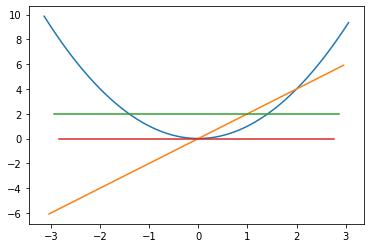

In [5]:
plt.figure()
plt.plot(x, y)
plt.plot(x[1:-1], dy1)
plt.plot(x[2:-2], dy2)
plt.plot(x[3:-3], dy3)
plt.show()

In [6]:
def tangent_of_curve(f, x, a, dx): return f(a) + derivative(f, a, dx) * (x - a)


def normal_line_of_curve(f, x, a, dx):
    df = derivative(f, a, dx)
    if abs(df) == 0:
        return f(a) * x
    return f(a) + (-1 * np.power(derivative(f, a, dx), -1)) * (x - a)

In [7]:
a = 1
yt = tangent_of_curve(f, x, a, dx)
yn = normal_line_of_curve(f, x1, a, dx)

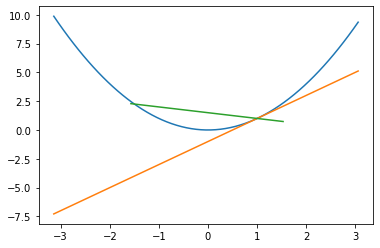

In [8]:
plt.figure()
plt.plot(x, y)
plt.plot(x, yt)
plt.plot(x1, yn)
plt.show()

In [9]:
def left_point_rule(f, a, b, n):
    h = (b - a) / n
    x = np.arange(a, b, h)
    y = f(x)
    s = y.sum() * h
    return s


def right_point_rule(f, a, b, n):
    h = (b - a) / n
    x = np.arange(a+h, b+h, h)
    y = f(x)
    s = y.sum() * h
    return s


def mid_point_rule(f, a, b, n):
    h = (b - a) / n
    x = np.arange(a+(h/2), b+(h/2), h)
    y = f(x)
    s = y.sum() * h
    return s


def trapezoidal_rule(f, a, b, n):
    h = (b - a) / n
    x = np.arange(a, b + h, h)
    y = f(x)
    s = h * ((y[0] + y[-1])/2 + y[1:-1].sum())
    return s


def simpsons_rule(f, a, b, n):
    h = (b - a) / (2 * n)
    x = np.arange(a, b + h, h)
    y = f(x)
    even = y[::2]
    odd = y[1::2]
    s = (h / 3) * (y[0] + y[-1] + 2*even[1:-1].sum() + 4*odd.sum())
    return s

In [10]:
a, b = -2, 2
n = 4
h = (b - a) / n

Left-point sum:  6.0


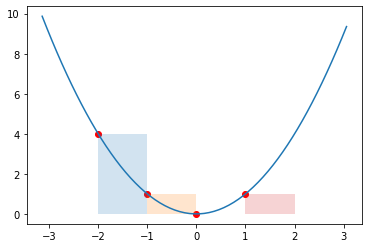

In [11]:
# Left-point sum
s = left_point_rule(f, a, b, n)
xp = np.arange(a, b, h)
yp = f(xp)
plt.plot(x, y)
plt.scatter(xp, yp, c="r")
plt.fill_between(xp[:2],[yp[0], yp[0]], alpha=0.2)
plt.fill_between(xp[1:3],[yp[1], yp[1]], alpha=0.2)
plt.fill_between(xp[2:4],[yp[2], yp[2]], alpha=0.2)
plt.fill_between([xp[-1],xp[-1] + h],[yp[-1], yp[-1]], alpha=0.2)
print("Left-point sum: ", s)

Right-point sum:  6.0


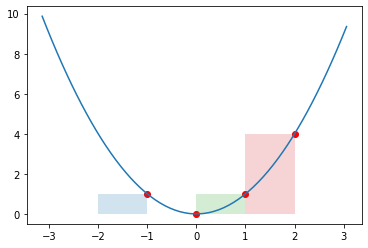

In [12]:
# Right-point sum
s = right_point_rule(f, a, b, n)
xp = np.arange(a+h, b+h, h)
yp = f(xp)
plt.plot(x, y)
plt.scatter(xp, yp, c="r")
plt.fill_between([xp[0]-h,xp[0]],[yp[0], yp[0]], alpha=0.2)
plt.fill_between(xp[:2],[yp[1], yp[1]], alpha=0.2)
plt.fill_between(xp[1:3],[yp[2], yp[2]], alpha=0.2)
plt.fill_between(xp[2:],[yp[3], yp[3]], alpha=0.2)
print("Right-point sum: ", s)

Mid-point sum:  5.0


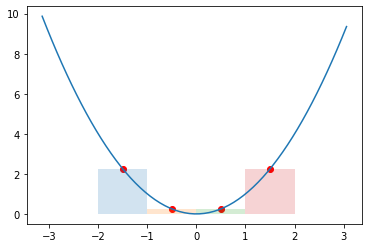

In [13]:
# Mid-point sum
s = mid_point_rule(f, a, b, n)
xp = np.arange(a, b, h)
xpc = np.arange(a+(h/2), b+(h/2), h)
yp = f(xpc)
plt.plot(x, y)
plt.scatter(xpc, yp, c="r")
plt.fill_between(xp[:2],[yp[0], yp[0]], alpha=0.2)
plt.fill_between(xp[1:3],[yp[1], yp[1]], alpha=0.2)
plt.fill_between(xp[2:4],[yp[2], yp[2]], alpha=0.2)
plt.fill_between([xp[-1],xp[-1] + h],[yp[-1], yp[-1]], alpha=0.2)
print("Mid-point sum: ", s)

Trapezoidal rule:  6.0


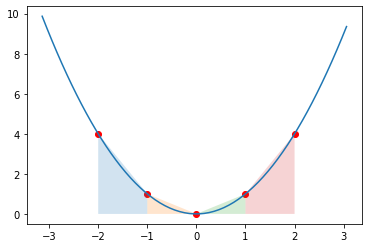

In [14]:
# Trapezoidal rule
s = trapezoidal_rule(f, a, b, n)
xp = np.arange(a, b + h, h)
yp = f(xp)
plt.plot(x, y)
plt.scatter(xp, yp, c="r")
plt.fill_between(xp[:2],yp[:2], alpha=0.2)
plt.fill_between(xp[1:3],yp[1:3], alpha=0.2)
plt.fill_between(xp[2:4],yp[2:4], alpha=0.2)
plt.fill_between(xp[3:],yp[3:], alpha=0.2)
print("Trapezoidal rule: ", s)

Simpson's rule:  5.333333333333333


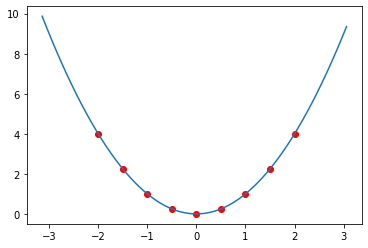

In [15]:
# Simpson's rule
s = simpsons_rule(f, a, b, n)
h = (b - a) / (2 * n)
xp = np.arange(a, b + h, h)
yp = f(xp)
plt.plot(x, y)
plt.scatter(xp, yp, c="r")
print("Simpson's rule: ", s)